In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 92.2 kB/s  0:03:39m0:00:0200:08
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for gensim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [797 lines of output]
      /private/var/folders/0n/j4l3hc0j7t73hxnv2bhms74r0000gn/T/pip-build-env-frqc9lk9/overlay/lib/python3.14/site-packages/setuptools/_distutils/dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      /private/var/folders/0n/j4l3hc0j7t73hxnv2bhms74r0000gn/T/pip-build-env-frqc9lk9/overlay/lib/python3.14/site-packages/setuptools/_distutils/dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running bdist_wheel
      running build
      running build_py
      creating build/lib.macosx-10.15-universal2-cpython-314/ge

In [15]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import json

# Ejemplo de como cargar un modelo pre entrenado.
import gensim.downloader as api
#https://github.com/piskvorky/gensim-data
#https://fasttext.cc
word_vectors = api.load("glove-wiki-gigaword-100") # modelo glove pre entrenado.


In [3]:

# Palabras a comparar
palabra1 = "king"
palabra2 = "queen"

# Obtener los vectores
vector1 = word_vectors[palabra1]
vector2 = word_vectors[palabra2]

# Calcular la similitud coseno
similitud = cosine_similarity([vector1], [vector2])[0][0]

print(f"Similitud entre '{palabra1}' y '{palabra2}': {similitud}")

palabra3 = "apple"

vector3 = word_vectors[palabra3]

similitud2 = cosine_similarity([vector1], [vector3])[0][0]

print(f"Similitud entre '{palabra1}' y '{palabra3}': {similitud2}")

Similitud entre 'king' y 'queen': 0.7507690787315369
Similitud entre 'king' y 'apple': 0.2667745053768158


In [4]:
palabra4 = "man"
palabra5 = "woman"


vector4 = word_vectors[palabra4]
vector5 = word_vectors[palabra5]

vector6 = vector1- vector4 + vector5

similitud3 = cosine_similarity([vector2], [vector6])[0][0]

print(f"Similitud entre '{palabra1}' y '{palabra3}': {similitud3}")

Similitud entre 'king' y 'apple': 0.7834413647651672


In [5]:
centroide1 = "evil"
vectorC1 = word_vectors[centroide1]

centroide2 = "good"
vectorC2 = word_vectors[centroide2]

similitudaux = cosine_similarity([vectorC1], [vector1])[0][0]
print(f"Similitud entre '{centroide1}' y '{palabra1}': {similitudaux}")
similitudaux = cosine_similarity([vectorC2], [vector1])[0][0]
print(f"Similitud entre '{centroide2}' y '{palabra1}': {similitudaux}")


similitudaux = cosine_similarity([vectorC1], [vector4])[0][0]
print(f"Similitud entre '{centroide1}' y '{palabra4}': {similitudaux}")
similitudaux = cosine_similarity([vectorC2], [vector4])[0][0]
print(f"Similitud entre '{centroide2}' y '{palabra4}': {similitudaux}")

Similitud entre 'evil' y 'king': 0.39176008105278015
Similitud entre 'good' y 'king': 0.4000930190086365
Similitud entre 'evil' y 'man': 0.5192545652389526
Similitud entre 'good' y 'man': 0.6494160294532776


In [6]:
!pip install -U transformers

In [7]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("tabularisai/multilingual-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("tabularisai/multilingual-sentiment-analysis")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

In [8]:
def predict_sentiment(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_map = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}
    return [sentiment_map[p] for p in torch.argmax(probabilities, dim=-1).tolist()], probabilities


In [9]:
predict_sentiment(texts="hola, estoy muy enojado, los odio.")

(['Positive'], tensor([[0.0748, 0.0610, 0.0183, 0.6012, 0.2447]]))

In [23]:

# Convierte a lista de diccionarios de Python
datos_lista = json.loads(datos_json_str)

# Crea el DataFrame
df_noticias = pd.DataFrame(datos_lista)


df_noticias.head()

,titular,fecha,tema,resumen
0,Desempleo en Colombia baja al 8.2% en octubre,2025-11-28,Economía,El DANE reveló que la tasa de desempleo nacion...
1,Avianca deja en tierra parte de su flota por r...,2025-11-27,Negocios / Transporte,La aerolínea Avianca anunció la inmovilización...
2,Barranquilla elegida sede de la final de la Su...,2025-11-27,Deportes,La Conmebol confirmó que el estadio Metropolit...
3,Kimberly-Clark anuncia cierre de planta de pro...,2025-11-26,Negocios,La multinacional Kimberly-Clark confirmó el ci...
4,Fiscalía imputará cargos al ex-canciller Álvar...,2025-11-25,Política / Judicial,La Fiscalía General citó a audiencia de imputa...


In [59]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nltk.download('punkt') # Use quiet=True to avoid verbose output
nltk.download('punkt_tab')
# Convert the 'resumen' column to a single text
all_resumen_text = ' '.join(df_noticias['resumen'].tolist())

# Tokenize the text
tokenized_resumen = word_tokenize(all_resumen_text)

print(f"Total tokens: {len(tokenized_resumen)}")

Total tokens: 741


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [54]:

def get_text_vector(tokens, word_vectors):
    valid_vectors = []
    for word in tokens:
        if word in word_vectors:
            valid_vectors.append(word_vectors[word])

    if valid_vectors:
        return valid_vectors
    return None

# Get the vector for the tokenized resumen
resumen_vector = get_text_vector(tokenized_resumen, word_vectors)

In [81]:
pd.DataFrame(resumen_vector).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.127765,-0.530106,-0.019139,0.212300,0.068087,0.111947,0.626458,0.518983,0.721839,-0.009356,...,-0.019864,-0.245687,0.300683,0.419965,-0.207772,0.367441,-0.654468,-0.525657,0.134750,-0.151772
std,0.403932,0.617990,0.635728,0.559705,0.375307,0.403287,0.461372,0.462896,0.639715,0.415337,...,0.432131,0.443096,0.420005,0.619821,0.502059,0.368888,0.528628,0.508899,0.514865,0.354053
min,-0.986120,-1.632800,-1.005100,-1.131700,-1.095400,-1.501600,-0.961300,-1.217800,-1.102600,-0.954040,...,-1.215400,-1.262600,-1.204300,-1.096100,-1.308300,-0.964650,-1.473600,-1.437600,-1.312100,-1.326400
25%,-0.186260,-0.865610,-0.524240,-0.180040,-0.118347,-0.149618,0.243655,0.159780,0.233280,-0.344690,...,-0.231980,-0.674120,0.008046,-0.052364,-0.650620,0.168950,-1.073725,-0.977160,-0.294662,-0.323040
50%,0.150205,-0.444280,-0.020260,0.323605,0.063344,0.095360,0.769730,0.503850,0.530810,-0.019169,...,-0.016699,-0.224400,0.420925,0.354250,-0.333920,0.343030,-0.673800,-0.498340,0.072053,-0.127170
75%,0.508440,-0.063680,0.586170,0.665570,0.322790,0.405400,1.012000,0.893360,1.157600,0.338885,...,0.290910,0.061549,0.497850,0.753420,0.148177,0.615650,-0.258860,-0.140302,0.501378,-0.013904
max,1.182300,1.562200,1.306100,2.025800,0.995330,1.082000,1.767600,1.350200,2.276200,1.131700,...,1.355700,1.231300,1.632200,1.540700,1.492300,1.115100,0.828140,0.844060,1.453500,1.699400


In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=4,          # Número de clusters deseado
    init='k-means++',      # Método de inicialización (mejora la elección de centroides)
    n_init='auto',         # Permite a sklearn elegir el mejor número de inicializaciones
    max_iter=300,          # Número máximo de iteraciones para cada inicialización
    random_state=42
)

kmeans.fit(resumen_vector)

clases = kmeans.predict(resumen_vector)

In [74]:
resumen_vector_np = np.vstack(resumen_vector)

tsne = TSNE(n_components=2, random_state=42, perplexity=80, n_iter=300)
embeddings_2d = tsne.fit_transform(resumen_vector_np)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


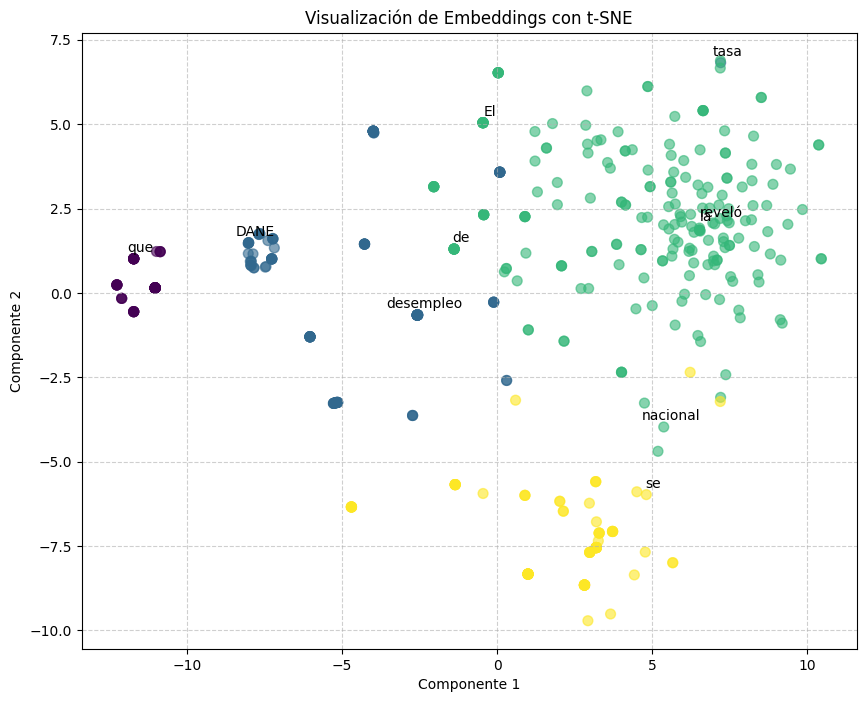

In [75]:
def plot_embeddings(data_2d, labels, title, color):
    """Genera un gráfico de dispersión de los embeddings reducidos."""
    plt.figure(figsize=(10, 8))

    # Diagrama de dispersión de los puntos
    plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6, s=50, c = color)

    # Opcional: Anotar un subconjunto de palabras clave
    # Anotaremos solo las primeras 10 para evitar un gráfico saturado
    for i in range(min(len(labels), 10)):
        plt.annotate(
            labels[i],
            (data_2d[i, 0], data_2d[i, 1]),
            textcoords="offset points",
            xytext=(5, 5),
            ha='center'
        )

    plt.title(title)
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Ejecutar la función de ploteo
plot_embeddings(embeddings_2d, tokenized_resumen, "Visualización de Embeddings con t-SNE", clases)